In [2]:
news_Art='nlp_Summarized_news_Art.csv'
import pandas as news_ArtP

news_Art_F = news_ArtP.read_csv(news_Art)
news_Art_F

,News,news_cat
0,across decad pop music numer perform laud cham...,culture
1,exhibit africa fashion victoria albert museum ...,culture
2,us writer mark twain famous wrote thing new id...,culture
3,thing never chang shrink ted lasso creator bil...,culture
4,one mani reason origin last us consid feat vid...,culture
...,...,...
182,mean women script chines n shu rose promin th ...,travel
183,one task though seem imposs rememb qq number s...,travel
184,roughli km south shanghai face east china sea ...,travel
185,final sourc mysteri nois appear long two prong...,travel


In [3]:
news_Art_F.news_cat.value_counts()

travel     80
sport      72
culture    35
Name: news_cat, dtype: int64

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer as news_Art_Ftfvtr

news_Art_Fvtr = news_Art_Ftfvtr(analyzer='char', ngram_range= (1,1))
news_Art_F_Xxx = news_Art_Fvtr.fit_transform(news_Art_F['News'].values.astype('U')).toarray()

In [5]:
print(news_Art_F_Xxx)

[[0.61473313 0.26384897 0.06533015 ... 0.00893907 0.06375593 0.00793946]
 [0.58826466 0.31645081 0.05519188 ... 0.01297156 0.03634587 0.00745478]
 [0.61023029 0.25145929 0.03834248 ... 0.00670953 0.04809057 0.0007712 ]
 ...
 [0.62662299 0.29322859 0.06047025 ... 0.01014517 0.06802903 0.01255788]
 [0.61079187 0.27786275 0.04268638 ... 0.01490639 0.02887608 0.00521453]
 [0.59555465 0.19746507 0.12407389 ... 0.02561973 0.02481478 0.        ]]


In [6]:
news_Art_F_Xxx.shape

(187, 27)

In [7]:
news_Art_F_Yyy = news_Art_F['news_cat']
news_Art_F_Yyy.head(n=5)

0    culture
1    culture
2    culture
3    culture
4    culture
Name: news_cat, dtype: object

In [8]:
from sklearn.model_selection import train_test_split as news_Art_Ftrnst

news_Art_etiz =0.40
news_Art_adm = 8
news_Art_F_XxxR, news_Art_F_XxxS, news_Art_F_YyyR, news_Art_F_YyyS = news_Art_Ftrnst(news_Art_F_Xxx, news_Art_F_Yyy, test_size=news_Art_etiz, random_state= news_Art_adm)

print(news_Art_F_XxxR.shape) #training data 60%

(112, 27)


In [9]:
# test and validation-20% & 20%
news_Art_etiz1 =0.5
news_Art_F_XxxV, news_Art_F_XxxS, news_Art_F_YyyV, news_Art_F_YyyS = news_Art_Ftrnst(news_Art_F_XxxS, news_Art_F_YyyS, test_size= news_Art_etiz1, random_state= news_Art_adm)

print(news_Art_F_XxxV.shape)
print(news_Art_F_XxxS.shape)

(37, 27)
(38, 27)


#### Machine learning algorithms

In [13]:
import warnings as news_Art_Fwwggs
news_Art_Fwwggs.filterwarnings("ignore")

In [14]:
from sklearn.metrics import classification_report as news_Art_Fcln
from sklearn.metrics import confusion_matrix as news_Art_Fcfnn
from sklearn.metrics import ConfusionMatrixDisplay as news_Art_Fcfmr
from sklearn.model_selection import GridSearchCV as news_Art_Fgis
import time as news_Art_Fttt

#### SGD classifier

In [15]:
from sklearn.linear_model import SGDClassifier as news_Art_Fssg

In [16]:

nws_athy = { 'penalty': ['l1','l2','elasticnet',None],
               'loss': ['log_loss','hinge','perceptron','log','huber'],
               'class_weight':['dict','balanced'],
             'tol':[1e-3,1e-4,1e-5,1e-6]}


nws_athyvb = news_Art_Fssg(random_state=news_Art_adm)
nws_athyvb = news_Art_Fgis(nws_athyvb, nws_athy,
                          cv=2, verbose=1)
nws_athyvb.fit(news_Art_F_XxxR, news_Art_F_YyyR)

print("Checking hypr para-news_Art :", nws_athyvb.best_params_)
print("score-news_Art: ", nws_athyvb.best_score_)

Fitting 2 folds for each of 160 candidates, totalling 320 fits
Checking hypr para-news_Art : {'class_weight': 'balanced', 'loss': 'perceptron', 'penalty': None, 'tol': 0.001}
score-news_Art:  0.6696428571428571



 training period: 0.007826566696166992 

              precision    recall  f1-score   support

     culture       0.29      1.00      0.44         8
       sport       0.89      0.57      0.70        14
      travel       0.00      0.00      0.00        15

    accuracy                           0.43        37
   macro avg       0.39      0.52      0.38        37
weighted avg       0.40      0.43      0.36        37


 validation period: 0.05994415283203125 



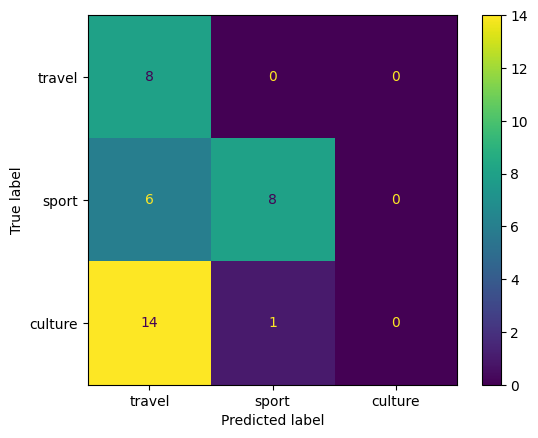

In [17]:
news_pdt11 = news_Art_Fttt.time()

news_Art_mo1= news_Art_Fssg( class_weight='balanced', loss='perceptron', penalty= None, tol=0.001)
news_Art_mo1.fit(news_Art_F_XxxR, news_Art_F_YyyR)

news_pdt22 = news_Art_Fttt.time()
print("\n training period:", news_pdt22-news_pdt11,"\n")


news_pdt11 = news_Art_Fttt.time()

news_Art_prc= news_Art_mo1.predict(news_Art_F_XxxV)

print(news_Art_Fcln(news_Art_F_YyyV, news_Art_prc))

g = news_Art_Fcfnn(news_Art_F_YyyV,news_Art_prc)
h = news_Art_Fcfmr(confusion_matrix = g, display_labels = ['travel','sport','culture'])
h.plot()

news_pdt22= news_Art_Fttt.time()
print("\n validation period:", news_pdt22-news_pdt11,"\n")

#### KNN classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier as news_Art_Fkghb

In [20]:

nws_athy = { 'weights': ['distance','uniform',None],
               'algorithm': ['ball_tree','auto','kd_tree','brute'],
               'p':[2,3,4,5,6,7],
             'n_neighbors':[5,6,7,8,9,10]}


nws_athyvb = news_Art_Fkghb()
nws_athyvb = news_Art_Fgis(nws_athyvb, nws_athy,
                          cv=2, verbose=1)
nws_athyvb.fit(news_Art_F_XxxR, news_Art_F_YyyR)

print("Checking hypr para-news_Art :", nws_athyvb.best_params_)
print("score-news_Art: ", nws_athyvb.best_score_)

Fitting 2 folds for each of 432 candidates, totalling 864 fits
Checking hypr para-news_Art : {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 3, 'weights': 'distance'}
score-news_Art:  0.5982142857142857



 training period: 0.0032868385314941406 

              precision    recall  f1-score   support

     culture       0.40      0.25      0.31         8
       sport       0.80      0.86      0.83        14
      travel       0.71      0.80      0.75        15

    accuracy                           0.70        37
   macro avg       0.64      0.64      0.63        37
weighted avg       0.68      0.70      0.68        37


 validation period: 0.060471534729003906 



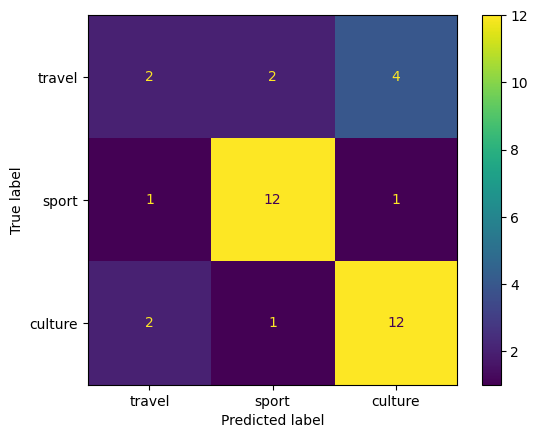

In [21]:
news_pdt11 = news_Art_Fttt.time()

news_Art_mo2= news_Art_Fkghb( algorithm='ball_tree', n_neighbors=5, p= 3, weights='distance')
news_Art_mo2.fit(news_Art_F_XxxR, news_Art_F_YyyR)

news_pdt22 = news_Art_Fttt.time()
print("\n training period:", news_pdt22-news_pdt11,"\n")


news_pdt11 = news_Art_Fttt.time()

news_Art_prc= news_Art_mo2.predict(news_Art_F_XxxV)

print(news_Art_Fcln(news_Art_F_YyyV, news_Art_prc))

g = news_Art_Fcfnn(news_Art_F_YyyV,news_Art_prc)
h = news_Art_Fcfmr(confusion_matrix = g, display_labels = ['travel','sport','culture'])
h.plot()

news_pdt22= news_Art_Fttt.time()
print("\n validation period:", news_pdt22-news_pdt11,"\n")

#### Naive bayes classifier

In [22]:
from sklearn.naive_bayes import GaussianNB as news_Art_Fsinn

In [24]:

nws_athy = { 'var_smoothing':[1e-9,1e-10,1e-11,1e-12]}


nws_athyvb = news_Art_Fsinn()
nws_athyvb = news_Art_Fgis(nws_athyvb, nws_athy,
                          cv=2, verbose=1)
nws_athyvb.fit(news_Art_F_XxxR, news_Art_F_YyyR)

print("Checking hypr para-news_Art :", nws_athyvb.best_params_)
print("score-news_Art: ", nws_athyvb.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Checking hypr para-news_Art : {'var_smoothing': 1e-09}
score-news_Art:  0.6428571428571428



 training period: 0.0036575794219970703 

              precision    recall  f1-score   support

     culture       0.33      0.25      0.29         8
       sport       0.88      0.50      0.64        14
      travel       0.52      0.80      0.63        15

    accuracy                           0.57        37
   macro avg       0.58      0.52      0.52        37
weighted avg       0.61      0.57      0.56        37


 validation period: 0.08000373840332031 



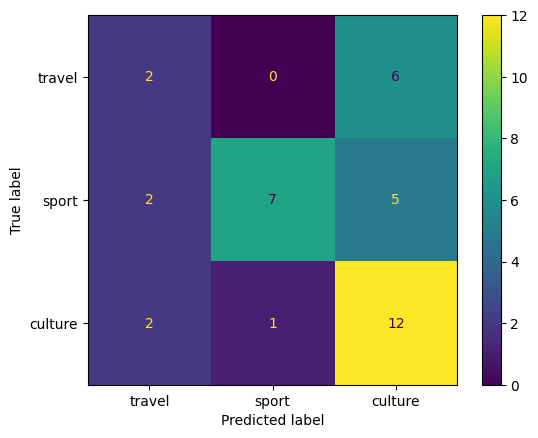

In [26]:
news_pdt11 = news_Art_Fttt.time()

news_Art_mo3= news_Art_Fsinn( var_smoothing=1e-09)
news_Art_mo3.fit(news_Art_F_XxxR, news_Art_F_YyyR)

news_pdt22 = news_Art_Fttt.time()
print("\n training period:", news_pdt22-news_pdt11,"\n")


news_pdt11 = news_Art_Fttt.time()

news_Art_prc= news_Art_mo3.predict(news_Art_F_XxxV)

print(news_Art_Fcln(news_Art_F_YyyV, news_Art_prc))

g = news_Art_Fcfnn(news_Art_F_YyyV,news_Art_prc)
h = news_Art_Fcfmr(confusion_matrix = g, display_labels = ['travel','sport','culture'])
h.plot()

news_pdt22= news_Art_Fttt.time()
print("\n validation period:", news_pdt22-news_pdt11,"\n")

#### Decision tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier as news_Art_Fsnre

In [28]:

nws_athy = { 'splitter': ['best','random'],
               'criterion': ['entropy','log_loss','gini'],
               'max_features':['sqrt','log2','auto'],
             'min_samples_split':[2,3,4,5,6,7]}


nws_athyvb = news_Art_Fsnre()
nws_athyvb = news_Art_Fgis(nws_athyvb, nws_athy,
                          cv=2, verbose=1)
nws_athyvb.fit(news_Art_F_XxxR, news_Art_F_YyyR)

print("Checking hypr para-news_Art :", nws_athyvb.best_params_)
print("score-news_Art: ", nws_athyvb.best_score_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
Checking hypr para-news_Art : {'criterion': 'log_loss', 'max_features': 'log2', 'min_samples_split': 3, 'splitter': 'best'}
score-news_Art:  0.6428571428571428



 training period: 0.006296634674072266 

              precision    recall  f1-score   support

     culture       0.29      0.25      0.27         8
       sport       0.64      0.50      0.56        14
      travel       0.53      0.67      0.59        15

    accuracy                           0.51        37
   macro avg       0.48      0.47      0.47        37
weighted avg       0.52      0.51      0.51        37


 validation period: 0.22605681419372559 



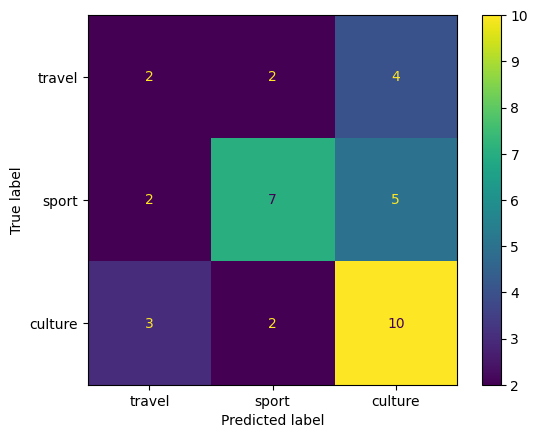

In [30]:
news_pdt11 = news_Art_Fttt.time()

news_Art_mo4= news_Art_Fsnre( criterion='log_loss',max_features='log2',min_samples_split=3, splitter='best')
news_Art_mo4.fit(news_Art_F_XxxR, news_Art_F_YyyR)

news_pdt22 = news_Art_Fttt.time()
print("\n training period:", news_pdt22-news_pdt11,"\n")


news_pdt11 = news_Art_Fttt.time()

news_Art_prc= news_Art_mo4.predict(news_Art_F_XxxV)

print(news_Art_Fcln(news_Art_F_YyyV, news_Art_prc))

g = news_Art_Fcfnn(news_Art_F_YyyV,news_Art_prc)
h = news_Art_Fcfmr(confusion_matrix = g, display_labels = ['travel','sport','culture'])
h.plot()

news_pdt22= news_Art_Fttt.time()
print("\n validation period:", news_pdt22-news_pdt11,"\n")

** KNN classifier algorithm has highest accuracy (70%)

#### KNN -Test prediction

              precision    recall  f1-score   support

     culture       0.44      0.50      0.47         8
       sport       0.85      0.85      0.85        13
      travel       0.75      0.71      0.73        17

    accuracy                           0.71        38
   macro avg       0.68      0.68      0.68        38
weighted avg       0.72      0.71      0.71        38


 Testing period: 0.0716850757598877 



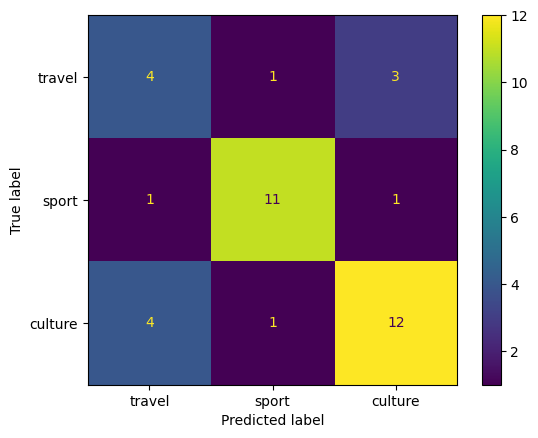

In [31]:
news_pdt11 = news_Art_Fttt.time()

news_Art_prc= news_Art_mo2.predict(news_Art_F_XxxS)

print(news_Art_Fcln(news_Art_F_YyyS, news_Art_prc))

g = news_Art_Fcfnn(news_Art_F_YyyS,news_Art_prc)
h = news_Art_Fcfmr(confusion_matrix = g, display_labels = ['travel','sport','culture'])
h.plot()

news_pdt22= news_Art_Fttt.time()
print("\n Testing period:", news_pdt22-news_pdt11,"\n")